https://yt-project.org/doc/analyzing/time_series_analysis.html

In [6]:
import yt 
from filesystem_autocomplete import walk_directory

In [7]:
ytData = walk_directory(yt.config.ytcfg.get("yt","test_data_dir"))

In [17]:
ytData.MHDBlast.id0

Directory: /home/chavlin/hdd/data/yt_data/yt_sample_sets/MHDBlast/id0

Files:
Blast.0000.vtk
Blast.0010.vtk
Blast.0020.vtk
Blast.0030.vtk
Blast.0040.vtk
Blast.0050.vtk
Blast.0060.vtk
Blast.0070.vtk
Blast.0080.vtk
Blast.0090.vtk
Blast.0100.vtk
Blast.hst

Subdirectories:

In [19]:
ts = yt.load(ytData.MHDBlast.id0.dirpath + "/Blast.0*")

In [20]:
ts

In [22]:
ds.field_list

[('athena', 'cell_centered_B_x'),
 ('athena', 'cell_centered_B_y'),
 ('athena', 'cell_centered_B_z'),
 ('athena', 'density'),
 ('athena', 'momentum_x'),
 ('athena', 'momentum_y'),
 ('athena', 'momentum_z'),
 ('athena', 'total_energy')]

In [8]:
def get_timestep_slice_as_mpl_fig(ds, fld, zmin, zmax):    
    slc = yt.SlicePlot(ds, "z", fld)
    slc.annotate_timestamp()
    slc.set_zlim(fld, zmin, zmax)
    slc.render()
    thefig = slc.plots[fld]
    return thefig.figure

In [10]:
ts = yt.load(ytData.MHDBlast.id0.dirpath + "/Blast.0*")
all_figs = []
for ds in ts:
    # print(ds.current_time)
    all_figs.append(get_timestep_slice_as_mpl_fig(ds, ('athena', 'density'), 1e-2, 1.5))

yt : [INFO     ] 2023-03-23 18:45:07,515 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2023-03-23 18:45:07,517 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-03-23 18:45:07,518 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-03-23 18:45:07,519 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2023-03-23 18:45:07,553 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-03-23 18:45:07,554 Parameters: domain_dimensions         = [100 150 100]
yt : [INFO     ] 2023-03-23 18:45:07,555 Parameters: domain_left_edge          = [-0.5  -0.75 -0.5 ]
yt : [INFO     ] 2023-03-23 18:45:07,556 Parameters: domain_right_edge         = [0.5  0.75 0.5 ]
yt : [INFO     ] 2023-03-23 18:45:07,556 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-03-23 18:45:08,112 xlim = -0.500000 0.500000
yt : [INFO     ] 2023-03-23 18:45:08,112 ylim = -0.750000 0.750000
yt : [INFO     ] 2023-03-23 18:45:08,115 xlim = -0.500000

In [12]:
del ts 
del ds

In [16]:
import ipywidgets as wg
from IPython.display import SVG

def f(i_t):
    return all_figs[i_t]    

wg.interact(f,i_t=wg.IntSlider(min=0,max=len(all_figs)-1,step=1));

interactive(children=(IntSlider(value=0, description='i_t', max=10), Output()), _dom_classes=('widget-interact…

In [26]:
ytData.enzo_tiny_cosmology

Directory: /home/chavlin/hdd/data/yt_data/yt_sample_sets/enzo_tiny_cosmology

Files:
32Mpc_32.enzo
32Mpc_32.inits
Enzo_Build
OutputLog

Subdirectories:
DD0000
DD0001
DD0002
DD0003
DD0004
DD0005
DD0006
DD0007
DD0008
DD0009
DD0010
DD0011
DD0012
DD0013
DD0014
DD0015
DD0016
DD0017
DD0018
DD0019
DD0020
DD0021
DD0022
DD0023
DD0024
DD0025
DD0026
DD0027
DD0028
DD0029
DD0030
DD0031
DD0032
DD0033
DD0034
DD0035
DD0036
DD0037
DD0038
DD0039
DD0040
DD0041
DD0042
DD0043
DD0044
DD0045
DD0046
RD0000
RD0001
RD0002
RD0003
RD0004
RD0005
RD0006
RD0007
RD0008
RD0009

In [27]:
my_sim = yt.load_simulation("enzo_tiny_cosmology/32Mpc_32.enzo", "Enzo")

yt : [INFO     ] 2023-03-23 18:12:49,929 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-03-23 18:12:49,930 Parameters: domain_left_edge          = [0. 0. 0.] Mpccm/h
yt : [INFO     ] 2023-03-23 18:12:49,931 Parameters: domain_right_edge         = [32. 32. 32.] Mpccm/h
yt : [INFO     ] 2023-03-23 18:12:49,931 Parameters: initial_time              = 1539875659811047.0 s
yt : [INFO     ] 2023-03-23 18:12:49,931 Parameters: final_time                = 4.350164285850582e+17 s
yt : [INFO     ] 2023-03-23 18:12:49,932 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-03-23 18:12:49,932 Parameters: box_size                  = 32.0 Mpccm/h
yt : [INFO     ] 2023-03-23 18:12:49,933 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2023-03-23 18:12:49,933 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2023-03-23 18:12:49,934 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-03-23 18:12:49,934 Parameters: hubble_co

In [28]:
my_sim.get_time_series()

yt : [INFO     ] 2023-03-23 18:13:03,748 57 outputs loaded into time series.


yt : [INFO     ] 2023-03-23 18:34:03,080 xlim = 0.061250 0.938750
yt : [INFO     ] 2023-03-23 18:34:03,081 ylim = 0.061250 0.938750
yt : [INFO     ] 2023-03-23 18:34:03,086 xlim = 0.061250 0.938750
yt : [INFO     ] 2023-03-23 18:34:03,086 ylim = 0.061250 0.938750
yt : [INFO     ] 2023-03-23 18:34:03,088 Making a fixed resolution buffer of (('enzo', 'Temperature')) 800 by 800



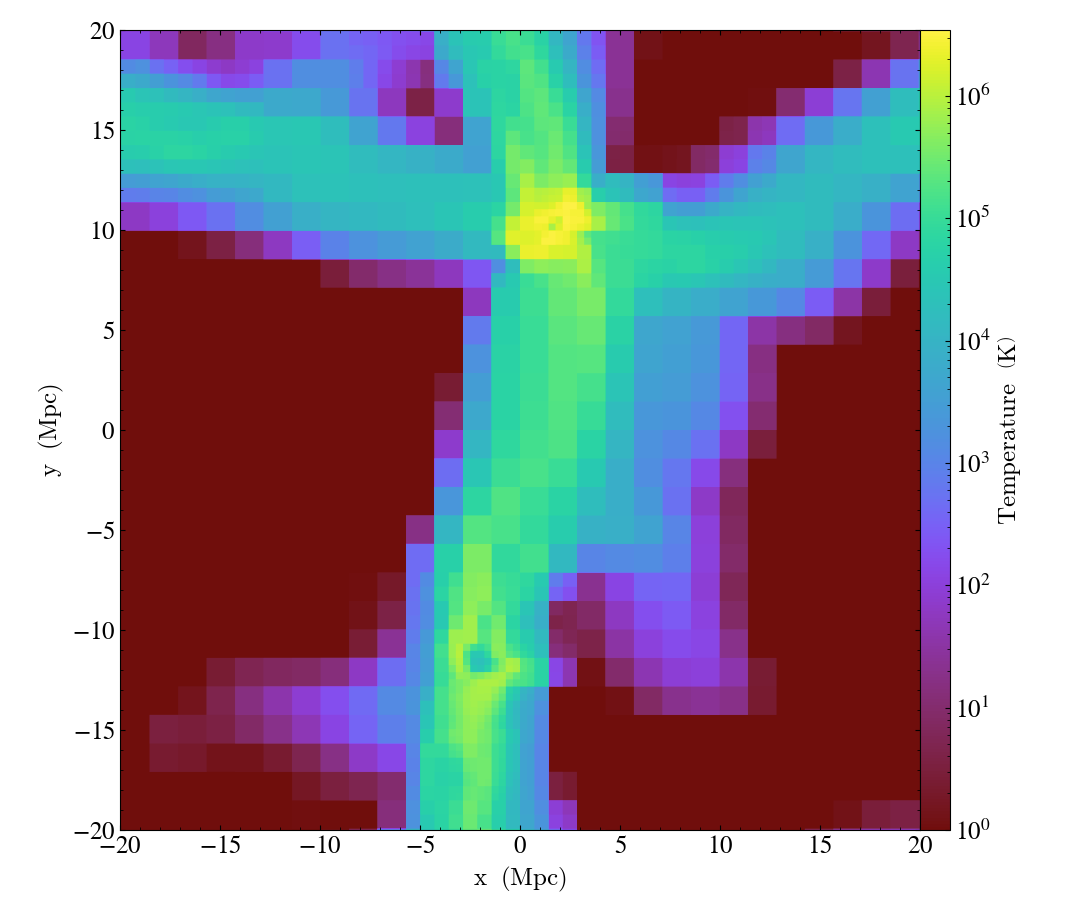

In [74]:
# def slice_and_get_image():

slc = yt.SlicePlot(ds, "z", ('enzo', 'Temperature'), width=(40, 'Mpc'))
slc.show()

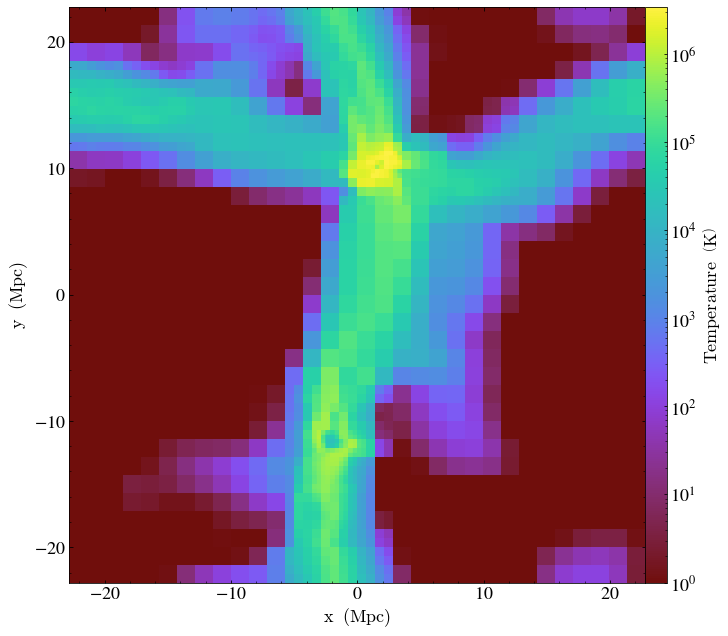

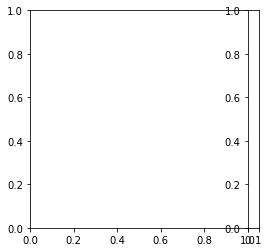

In [42]:
fg

In [75]:
all_figs = []
for ds in my_sim.piter():
    fld = ("enzo", "Temperature")
    slc = yt.SlicePlot(ds, "z", fld, width=(40, 'Mpc'))
    slc.annotate_timestamp()
    slc.set_zlim(fld, 1, 1e6)
    slc.render()
    T = slc.plots[fld]
    all_figs.append(T.figure)
    

yt : [INFO     ] 2023-03-23 18:34:12,665 Parameters: current_time              = 0.8165104336731
yt : [INFO     ] 2023-03-23 18:34:12,665 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2023-03-23 18:34:12,666 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-03-23 18:34:12,666 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-03-23 18:34:12,667 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-03-23 18:34:12,667 Parameters: current_redshift          = 49.999999864349
yt : [INFO     ] 2023-03-23 18:34:12,667 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2023-03-23 18:34:12,668 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2023-03-23 18:34:12,668 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-03-23 18:34:12,669 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|████████████████████████████████████████████████████████████████████████████

In [76]:
len(all_figs)

57

In [77]:
import ipywidgets as wg
from IPython.display import SVG

def f(i_t):
    return all_figs[i_t]    

wg.interact(f,i_t=wg.IntSlider(min=0,max=len(all_figs)-1,step=1));

interactive(children=(IntSlider(value=0, description='i_t', max=56), Output()), _dom_classes=('widget-interact…